<a href="https://colab.research.google.com/github/bala-ceg/backtest-strategies/blob/main/weeklyexpiry_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Install & Import Necessary Libs

In [ ]:
!pip install nsepython

In [2]:
from nsepython import *

## NIFTY OI sample snippet

In [112]:
symbol = "NIFTY"
start_date = "15-05-2024"
end_date ="15-05-2024"
instrumentType = "options"
expiry_date ="16-May-2024"
put_df = derivative_history(symbol,start_date,end_date,instrumentType,expiry_date,strikePrice="",optionType="PE")
call_df = derivative_history(symbol,start_date,end_date,instrumentType,expiry_date,strikePrice="",optionType="CE")
if not put_df.empty:
  put_df['FH_OPEN_INT'] = put_df['FH_OPEN_INT'].astype(int)
  put_df['FH_TOT_TRADED_QTY'] = put_df['FH_TOT_TRADED_QTY'].astype(int)
  put_df = put_df.sort_values(by=['FH_OPEN_INT'], ascending=False)
  underlying_value = put_df['FH_UNDERLYING_VALUE'].iloc[0]

if not call_df.empty:
  call_df['FH_OPEN_INT'] = call_df['FH_OPEN_INT'].astype(int)
  call_df['FH_TOT_TRADED_QTY'] = call_df['FH_TOT_TRADED_QTY'].astype(int)
  call_df = call_df.sort_values(by=['FH_OPEN_INT'], ascending=False)
  underlying_value = call_df['FH_UNDERLYING_VALUE'].iloc[0]

In [113]:
put_total_open_int = put_df['FH_OPEN_INT'].sum()
put_total_volume = put_df['FH_TOT_TRADED_QTY'].sum()

put_df['FH_OPEN_INT_PERCENTAGE'] = (put_df['FH_OPEN_INT'] / put_total_open_int) * 100

put_df[['FH_STRIKE_PRICE', 'FH_OPEN_INT','FH_OPEN_INT_PERCENTAGE']].head(5)

,FH_STRIKE_PRICE,FH_OPEN_INT,FH_OPEN_INT_PERCENTAGE
33,22000.00,6796975,8.153475
29,22200.00,5549775,6.657366
37,21800.00,5087150,6.102413
39,21700.00,5054100,6.062767
35,21900.00,4593825,5.510633


In [114]:
put_df['FH_STRIKE_PRICE'] = put_df['FH_STRIKE_PRICE'].astype(float)
put_df['ABS_DIFF'] = abs(put_df['FH_STRIKE_PRICE'] - float(underlying_value))

sorted_put_df = put_df.sort_values(by='ABS_DIFF')

closest_rows = sorted_put_df[['FH_STRIKE_PRICE', 'FH_OPEN_INT','ABS_DIFF','FH_OPEN_INT_PERCENTAGE','FH_TOT_TRADED_QTY']]

print(closest_rows.head(3))
print(underlying_value)
put_df['FH_OPEN_INT'].idxmax()
row_with_max_open_int = put_df.loc[put_df['FH_OPEN_INT'].idxmax()]
row_with_max_open_int['FH_OPEN_INT']
near_strike_put_open_int = closest_rows['FH_OPEN_INT'].head(3).sum()
print(near_strike_put_open_int)
near_strike_put_vol = closest_rows['FH_TOT_TRADED_QTY'].head(3).sum()
print(near_strike_put_vol)

    FH_STRIKE_PRICE  FH_OPEN_INT  ABS_DIFF  FH_OPEN_INT_PERCENTAGE  \
29          22200.0      5549775      0.55                6.657366   
28          22250.0      1170175     49.45                1.403712   
30          22150.0      2765050     50.55                3.316882   

    FH_TOT_TRADED_QTY  
29          239537825  
28          111107025  
30          137705175  
22200.55
9485000
488350025


In [115]:
call_total_open_int = call_df['FH_OPEN_INT'].sum()
call_total_volume = call_df['FH_TOT_TRADED_QTY'].sum()

call_df['FH_OPEN_INT_PERCENTAGE'] = (call_df['FH_OPEN_INT'] / call_total_open_int) * 100

call_df[['FH_STRIKE_PRICE', 'FH_OPEN_INT','FH_OPEN_INT_PERCENTAGE']].head(5)


,FH_STRIKE_PRICE,FH_OPEN_INT,FH_OPEN_INT_PERCENTAGE
23,22500.00,10505750,10.220754
27,22300.00,7514425,7.310577
21,22600.00,6759925,6.576545
13,23000.00,6750675,6.567546
29,22200.00,6618650,6.439102


In [116]:
call_df['FH_STRIKE_PRICE'] = call_df['FH_STRIKE_PRICE'].astype(float)
call_df['ABS_DIFF'] = abs(call_df['FH_STRIKE_PRICE'] - float(underlying_value))

# Sort by the absolute difference
sorted_call_df = call_df.sort_values(by='ABS_DIFF')

# Select the rows that are closest to the underlying value
closest_rows = sorted_call_df[['FH_STRIKE_PRICE', 'FH_OPEN_INT','ABS_DIFF','FH_OPEN_INT_PERCENTAGE','FH_TOT_TRADED_QTY']]

print(closest_rows.head(3))
print(underlying_value)
call_df['FH_OPEN_INT'].idxmax()
row_with_max_open_int = call_df.loc[call_df['FH_OPEN_INT'].idxmax()]
row_with_max_open_int['FH_OPEN_INT']
near_strike_call_open_int = closest_rows['FH_OPEN_INT'].head(3).sum()
print(near_strike_call_open_int)
near_strike_call_vol = closest_rows['FH_TOT_TRADED_QTY'].head(3).sum()
print(near_strike_call_vol)

    FH_STRIKE_PRICE  FH_OPEN_INT  ABS_DIFF  FH_OPEN_INT_PERCENTAGE  \
29          22200.0      6618650      0.55                6.439102   
28          22250.0      4609375     49.45                4.484334   
30          22150.0      1405575     50.55                1.367445   

    FH_TOT_TRADED_QTY  
29          253108450  
28          166110675  
30           91464250  
22200.55
12633600
510683375


In [117]:
pcr = float(put_total_open_int/call_total_open_int)
print("PCR OI:",pcr)
pcr_vol = float(put_total_volume/call_total_volume)
print("PCR volume:",pcr_vol)

PCR OI: 0.81101491024279
PCR volume: 0.956894783689029


In [118]:
near_pcr = float(near_strike_put_open_int/near_strike_call_open_int)
print("Near PCR OI:",near_pcr)
pcr_vol = float(near_strike_put_vol/near_strike_call_vol)
print("Near PCR volume:",pcr_vol)

Near PCR OI: 0.7507757092198581
Near PCR volume: 0.9562677167628573


In [ ]:
call_df[['FH_STRIKE_PRICE', 'FH_OPEN_INT','ABS_DIFF','FH_OPEN_INT_PERCENTAGE']].head(15)

In [ ]:
call_df[['FH_STRIKE_PRICE', 'FH_OPEN_INT']]

In [33]:
import pandas as pd
historic_nifty_df = pd.read_csv('/content/Nifty50_5Ydata.csv')
historic_nifty_df['Date'] = pd.to_datetime(historic_nifty_df['Date'], format="%d-%m-%Y")
numeric_columns = ["Open", "High", "Low", "Price"]
for column in numeric_columns:
    historic_nifty_df[column] = historic_nifty_df[column].str.replace(",", "").astype(float)
historic_nifty_df['Change %'] = historic_nifty_df['Change %'].str.replace("%", "").astype(float)
historic_nifty_df

,Date,Price,Open,High,Low,Vol.,Change %
0,2024-06-20,23567.00,23586.15,23624.00,23442.60,280.34B,0.22
1,2024-06-19,23516.00,23629.85,23664.00,23412.90,328.81B,-0.18
2,2024-06-18,23557.90,23570.80,23579.05,23499.70,272.21B,0.39
3,2024-06-14,23465.60,23464.95,23490.40,23334.25,223.09B,0.29
4,2024-06-13,23398.90,23480.95,23481.05,23353.90,268.28B,0.33
...,...,...,...,...,...,...,...
1290,2019-04-04,11598.00,11660.20,11662.55,11559.20,349.03B,-0.39
1291,2019-04-03,11643.95,11735.30,11761.00,11629.15,365.76B,-0.59
1292,2019-04-02,11713.20,11711.55,11729.35,11655.85,386.13B,0.38
1293,2019-04-01,11669.15,11665.20,11738.10,11644.75,379.57B,0.39


In [34]:
data = historic_nifty_df.copy()
data['Day_of_Week'] = data['Date'].dt.dayofweek
data = data[['Date', 'Price', 'Day_of_Week','Change %']]
data['Week_Number'] = data['Date'].dt.isocalendar().week
data['Year'] = data['Date'].dt.isocalendar().year

day_map = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday'}
data['Day_of_Week'] = data['Day_of_Week'].map(day_map)

pivoted_data_1 = data.pivot_table(index=['Year', 'Week_Number'], columns='Day_of_Week', values='Price')
pivoted_data_2 = data.pivot_table(index=['Year', 'Week_Number'], columns='Day_of_Week', values='Change %')

In [35]:
pivoted_data_1.columns.name = None
pivoted_data_1.reset_index(inplace=True)


pivoted_data_2.columns.name = None
pivoted_data_2.reset_index(inplace=True)

pivoted_data_1['Friday'] = pivoted_data_1['Friday'].shift(1)

pivoted_data_1 = pivoted_data_1[['Year', 'Week_Number', 'Friday', 'Monday', 'Tuesday',  'Wednesday','Thursday']]
pivoted_data_1 = pivoted_data_1.dropna(thresh=pivoted_data_1.shape[1] - 5 + 1)
pivoted_data_1['Thursday'].fillna(pivoted_data_1['Wednesday'], inplace=True)

pivoted_data_2['Friday'] = pivoted_data_2['Friday'].shift(1)

pivoted_data_2 = pivoted_data_2[['Year', 'Week_Number', 'Friday', 'Monday', 'Tuesday',  'Wednesday','Thursday']]
pivoted_data_2 = pivoted_data_2.dropna(thresh=pivoted_data_2.shape[1] - 5 + 1)
pivoted_data_2['Thursday'].fillna(pivoted_data_2['Wednesday'], inplace=True)

In [36]:
len(pivoted_data_1)

273

In [37]:
pivoted_data_1

,Year,Week_Number,Friday,Monday,Tuesday,Wednesday,Thursday
1,2019,14,11623.90,11669.15,11713.20,11643.95,11598.00
2,2019,15,11665.95,11604.50,11671.95,11584.30,11596.70
3,2019,16,11643.45,11690.35,11787.15,NaN,11752.80
4,2019,17,NaN,11594.45,11575.95,11726.15,11641.80
5,2019,18,11754.65,NaN,11748.15,NaN,11724.75
...,...,...,...,...,...,...,...
269,2024,21,22466.10,NaN,22529.05,22597.80,22967.65
270,2024,22,22957.10,22932.45,22888.15,22704.70,22488.65
271,2024,23,22530.70,23263.90,21884.50,22620.35,22821.40
272,2024,24,23290.15,23259.20,23264.85,23322.95,23398.90


In [ ]:
pivoted_data_2['Year_Week'] = pivoted_data_2['Year'].astype(str) + '_' + pivoted_data_2['Week_Number'].astype(str)
pivoted_data_3 = pivoted_data_2[pivoted_data_2['Year'] == 2024]
print(len(pivoted_data_3))
len(pivoted_data_3[(pivoted_data_3['Thursday'] < 0.5) & (pivoted_data_3['Thursday'] > -0.5)])

In [65]:
pivoted_data_3

,Year,Week_Number,Friday,Monday,Tuesday,Wednesday,Thursday,Year_Week
249,2024,1,-0.22,0.05,-0.35,-0.69,0.66,2024_1
250,2024,2,0.24,-0.91,0.15,0.34,0.13,2024_2
251,2024,3,1.14,0.93,-0.29,-2.09,-0.51,2024_3
252,2024,4,0.75,NaN,-1.54,1.01,-0.47,2024_4
253,2024,5,NaN,1.80,-0.99,0.95,-0.13,2024_5
254,2024,6,0.72,-0.38,0.72,0.01,-0.97,2024_6
255,2024,7,0.30,-0.76,0.59,0.45,0.32,2024_7
256,2024,8,0.59,0.37,0.34,-0.64,0.74,2024_8
257,2024,9,-0.02,-0.41,0.34,-1.11,0.14,2024_9
258,2024,10,1.62,0.12,-0.22,0.53,0.09,2024_10


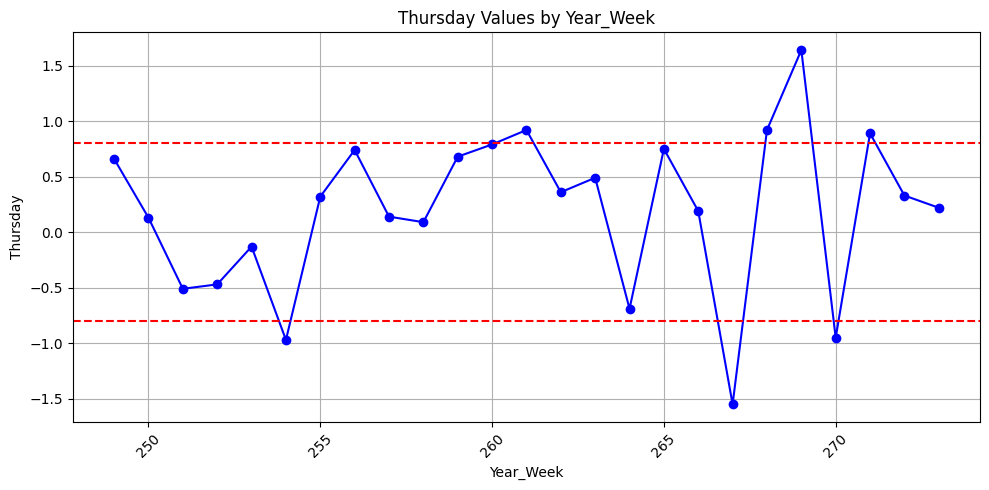

In [64]:

from matplotlib import pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(pivoted_data_3['Thursday'], marker='o', linestyle='-', color='b')
plt.xlabel('Year_Week')
plt.ylabel('Thursday')
plt.title('Thursday Values by Year_Week')
plt.xticks(rotation=45)
plt.grid(True)
plt.axhline(y=0.8, color='red', linestyle='--')
plt.axhline(y=-0.8, color='red', linestyle='--')
plt.tight_layout()
plt.show()